# Data Preprocessing and Visualization for Loan Approval Analysis

In this first part, we'll preprocess the raw loan dataset and generate visual insights. This prepares the data for predictive modeling using Scikit-learn or PyTorch.

Steps we'll cover:
1. Load and inspect raw data
2. Clean data (drop columns, handle missing values)
3. Encode categorical variables
4. Scale numerical features
5. Save preprocessed dataset
6. Visualize key feature distributions and relationships



In [ ]:
#Import pandas for data manipulation and analysis
import pandas as pd

# Step 1: Load the dataset from the local CSV file
Replace the path if using a different working directory
Clean column names and string values

In [ ]:

csv_path = 'loan_approval_dataset.csv'
df = pd.read_csv(csv_path)

In [ ]:
# Strip whitespace from column names and string columns
df.columns = df.columns.str.strip() #Remove whitespace from column headers
df['education'] = df['education'].str.strip() # Clean 'education' values
df['self_employed'] = df['self_employed'].str.strip()# Clean 'self_employed' values
df['loan_status'] = df['loan_status'].str.strip()# Clean 'loan_status' values

# Step 2: Map categorical string values to binary numerical values

In [ ]:

# These are required for ML models which expect numeric input
df['education'] = df['education'].map({'Graduate': 1, 'Not Graduate': 0})
df['self_employed'] = df['self_employed'].map({'Yes': 1, 'No': 0})
df['loan_status'] = df['loan_status'].map({'Approved': 1, 'Rejected': 0})

# Step 3: Save the encoded dataset to a new CSV file
This intermediate file will be used for scaling

In [ ]:

encoded_csv_path = "loan_approval_encoded.csv"
df.to_csv(encoded_csv_path, index=False)

# Step 4: Display a preview of the encoded categorical columns


In [ ]:

df[['education', 'self_employed', 'loan_status']].head()

,education,self_employed,loan_status
0,1,0,1
1,0,1,0
2,1,0,0
3,1,0,0
4,0,1,0


# Step 5: Import MinMaxScaler and apply normalization

In [ ]:

from sklearn.preprocessing import MinMaxScaler

# Load the encoded dataset
df = pd.read_csv("loan_approval_encoded.csv")

# Step 6: Identify numeric columns for scaling
# Exclude the target column ('loan_status') and identifier ('loan_id')
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = numeric_cols.drop('loan_status', errors='ignore')  # Target column
numeric_cols = numeric_cols.drop(['loan_id'], errors='ignore')

# Step 7: Apply MinMaxScaler to normalize features to range [0, 1]
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Step 8: Save the scaled dataset to a new CSV file
scaled_csv_path = "loan_approval_scaled.csv"
df.to_csv(scaled_csv_path, index=False)

# Step 9: Display a preview of the scaled numeric features
df[numeric_cols].head()


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,0.4,1.0,0.0,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218
1,0.0,0.0,1.0,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490
2,0.6,1.0,0.0,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748
3,0.6,1.0,0.0,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415
4,1.0,0.0,1.0,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136


# Data Visualization 

Description:
The scaled data is used to perform exploratory data visualization using this script.
 encoded loan approval dataset. It includes:
     - Loan approval distribution
     - Annual income histogram
     - CIBIL score by loan status
     - Feature correlation heatmap
    - Comparison of loan status between education levels

# Plot 1: This is the count of approved vs rejected loans in a Loan Approval Distribution.
sns.countplot() shows counts of each class (Approved/Rejected)
plt handles title, axis labels, and rendering

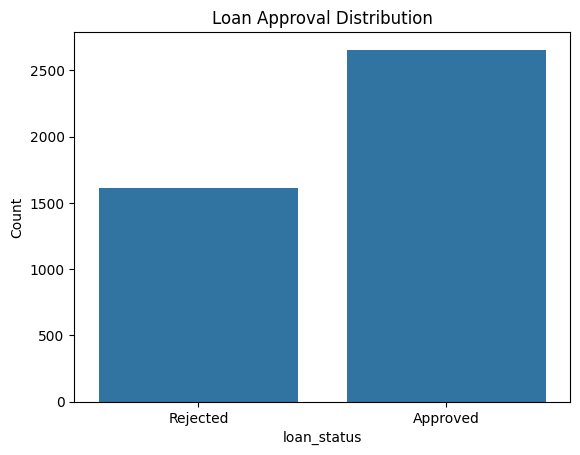

In [ ]:
import seaborn as sns #Seaborn: high-level plotting API built on top of Matplotlib for statistical graphics
import matplotlib.pyplot as plt #Matplotlib's pyplot: provides control over plots (titles, labels, show, etc.)
sns.countplot(x='loan_status', data=df)
plt.title('Loan Approval Distribution')
plt.xticks([0, 1], ['Rejected', 'Approved'])
plt.ylabel('Count')
plt.show()


# Plot 2 : Distribution of Annual Income (scaled) visualizes distribution of income among applicants
sns.histplot() plots a histogram and optional KDE (density curve)
plt customizes labels and title

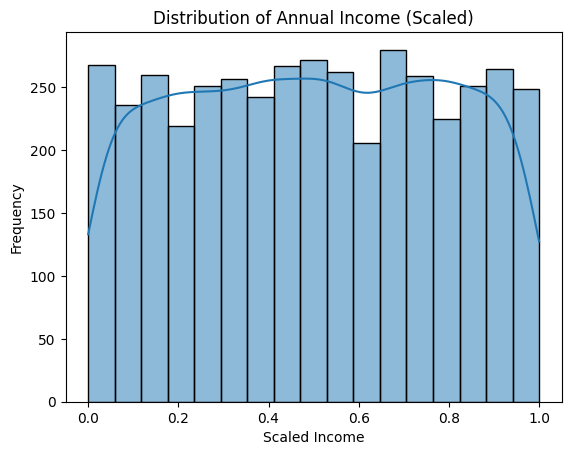

In [ ]:

sns.histplot(df['income_annum'], kde=True)
plt.title('Distribution of Annual Income (Scaled)')
plt.xlabel('Scaled Income')
plt.ylabel('Frequency')
plt.show()


# Plot3:  CIBIL Score vs Loan Status (boxplot) Comparing the CIBIL scores between approved and rejected loan applications
sns.boxplot() shows CIBIL score distribution across loan status groups

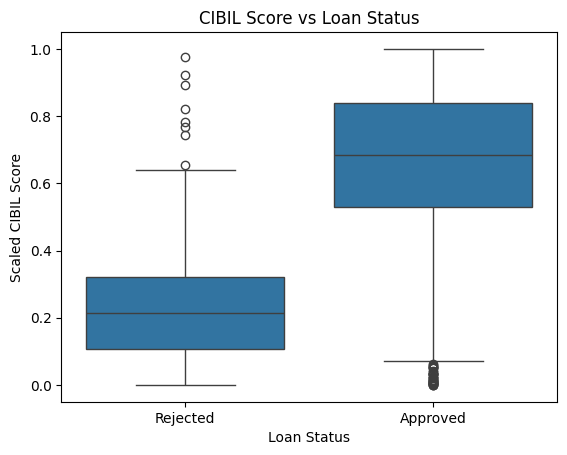

In [ ]:

sns.boxplot(x='loan_status', y='cibil_score', data=df)
plt.title('CIBIL Score vs Loan Status')
plt.xticks([0, 1], ['Rejected', 'Approved'])
plt.xlabel('Loan Status')
plt.ylabel('Scaled CIBIL Score')
plt.show()


# Plot 4 :  Feature Correlation Heatmap Displays pairwise correlations between all numeric features and is plotted 
sns.heatmap() visualizes pairwise feature correlations
plt sets size and title

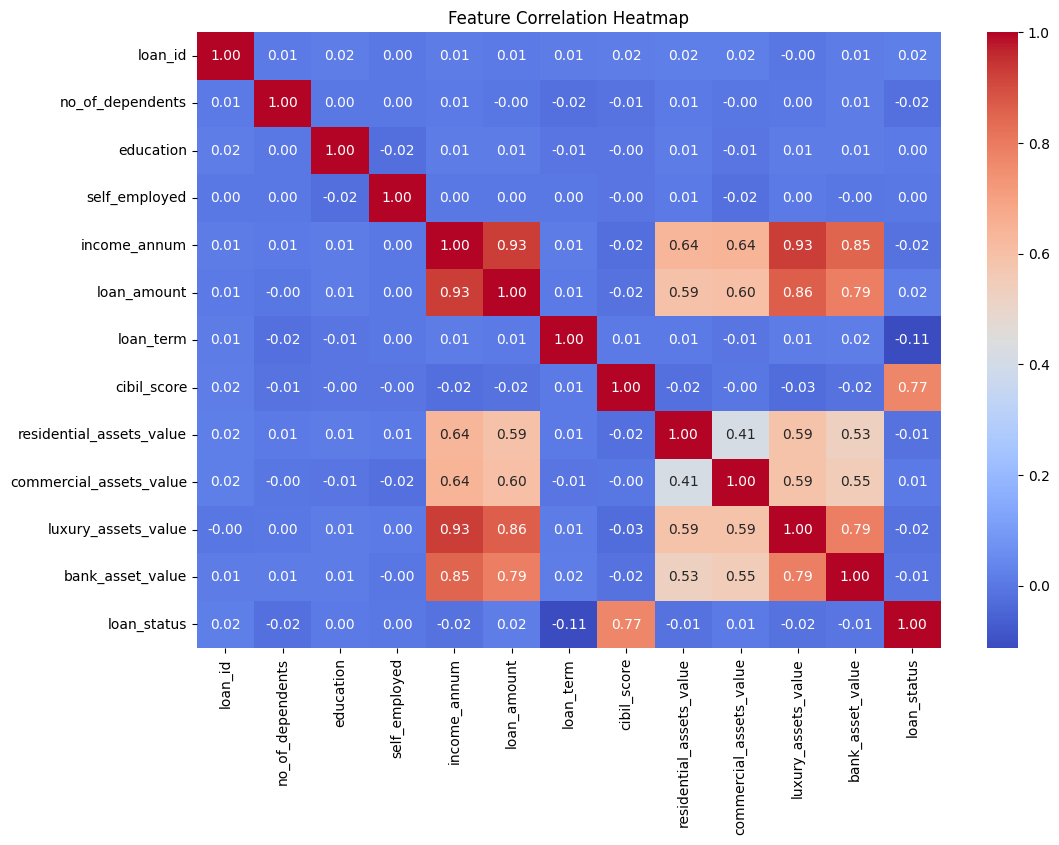

In [ ]:

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


# Plot 5 :  Education vs Loan Status (grouped bar plot) Examines the relationship between education level and loan approval outcome
sns.countplot() with hue compares education levels by loan status

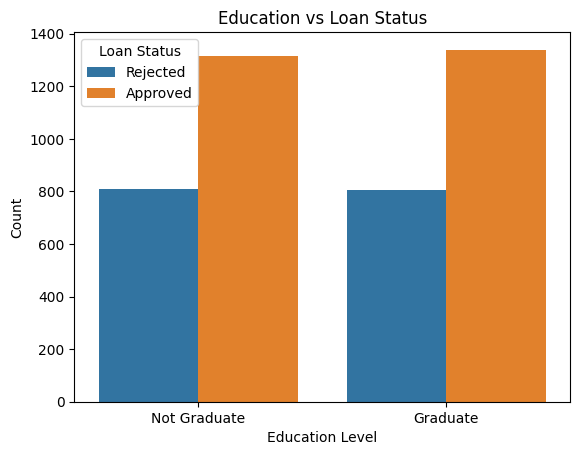

In [ ]:

sns.countplot(x='education', hue='loan_status', data=df)
plt.title('Education vs Loan Status')
plt.xticks([0, 1], ['Not Graduate', 'Graduate'])
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Loan Status', labels=['Rejected', 'Approved'])
plt.show()


# Loan Approval Prediction using XGBoost and Supervised and Unsupervised Learning
This section builds a machine learning pipeline to predict loan approvals using XGBoost (Supervised Learning) and explores data patterns using KMeans and PCA (Unsupervised Learning). It also includes steps for model evaluation, feature importance, dimensionality reduction, and model saving.

# Step 1: Load and Prepare Data
We begin by importing the encoded dataset containing features such as applicant income, loan amount, credit history, etc.
train_test_split is used to divide the dataset into training and testing subsets. Stratification ensures the target variable’s distribution is maintained in both sets, preventing data imbalance issues during training.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv("loan_approval_encoded.csv")#Read encoded data


X = df.drop(columns=['loan_status', 'loan_id'])  # Drop target and ID
y = df['loan_status']  # Target variable

#split into train sets and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Step 2: Train an XGBoost Classifier (Supervised Learning)
XGBoost (Extreme Gradient Boosting) is a powerful, ensemble-based supervised learning algorithm. It builds multiple decision trees in sequence, correcting the errors of previous trees to improve prediction accuracy. It handles missing data, regularization, and overfitting well.

In [ ]:
#Train XgBoost Model
from xgboost import XGBClassifier
#Supervised Learning
# Initialize the XGBoost classifier
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# This trains the model on the training data (X_train) and the target labels supervised learning
xgb_model.fit(X_train, y_train) 


C:\Users\nmegh\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [14:21:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predict on the test set
y_pred = xgb_model.predict(X_test)


# Step 3: Evaluate Model Performance
Accuracy: Measures the ratio of correct predictions to total predictions.

Classification Report: Includes precision, recall, and F1-score to assess class-wise performance.

Confusion Matrix: A table showing correct vs incorrect predictions, helping analyze false positives and negatives.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#evaluated the model's performance using accuracy, classification report, and confusion matrix.
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       323
           1       0.98      0.99      0.99       531

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

Confusion Matrix:
[[314   9]
 [  6 525]]


In [ ]:
from sklearn.metrics import confusion_matrix

# Step 1: Make predictions on the test data
y_pred = xgb_model.predict(X_test)  # X_test is your test features

# Step 2: Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)  # y_test is the actual labels

# Step 3: Print and interpret the confusion matrix
print("Confusion Matrix:")
print(cm)

# Extract values from the confusion matrix for easier understanding
TN, FP, FN, TP = cm.ravel()

# Printing out the individual values
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")


Confusion Matrix:
[[314   9]
 [  6 525]]
True Negatives (TN): 314
False Positives (FP): 9
False Negatives (FN): 6
True Positives (TP): 525


# Step 4: Feature Importance Visualization
XGBoost can calculate the importance of each feature in making predictions. plot_importance ranks and visualizes features based on how often they are used in decision splits across trees, aiding interpretability.

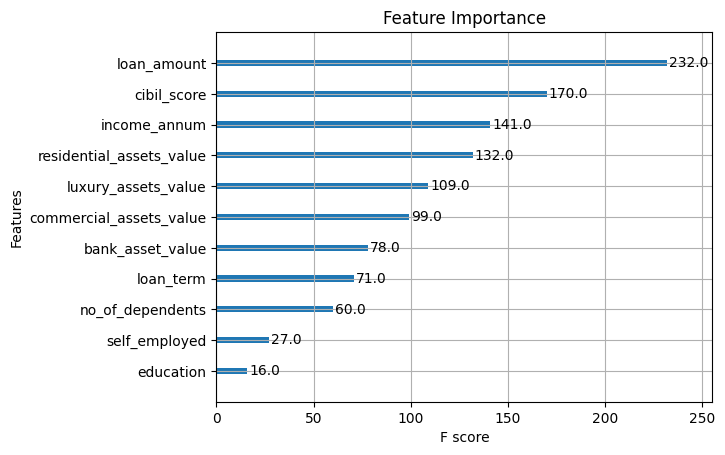

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance
#Visualization using plot_importance 
plot_importance(xgb_model)
plt.title('Feature Importance')
plt.show()


# Step 5: Apply KMeans Clustering (Unsupervised Learning)
KMeans is an unsupervised algorithm that partitions data into k distinct clusters based on similarity. It assigns each data point to the nearest cluster center (centroid) and iteratively updates centroids to minimize within-cluster variance.

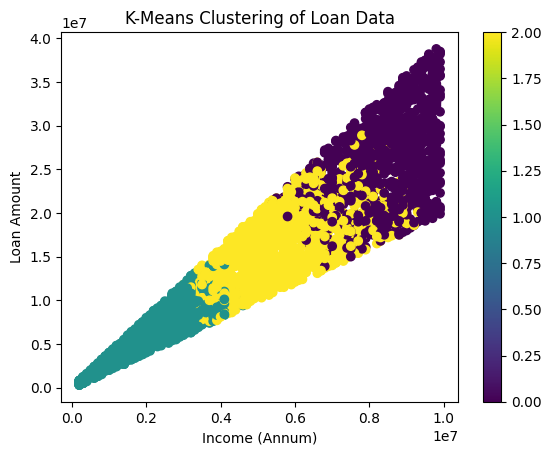

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply KMeans clustering 
# unsupervised learning
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

# Get predicted clusters
clusters = kmeans.predict(X_train)

# Add the cluster labels to the DataFrame for analysis
X_train['Cluster'] = clusters

# Visualize the clusters (using two features: income_annum and loan_amount)
plt.scatter(X_train['income_annum'], X_train['loan_amount'], c=clusters, cmap='viridis')
plt.xlabel('Income (Annum)')
plt.ylabel('Loan Amount')
plt.title('K-Means Clustering of Loan Data')
plt.colorbar()
plt.show()


# Step 6: Dimensionality Reduction using PCA (Unsupervised)
PCA is a dimensionality reduction technique that transforms data into new axes (principal components) which capture the most variance. It is often used to visualize high-dimensional data in 2D or 3D, especially for clustering.

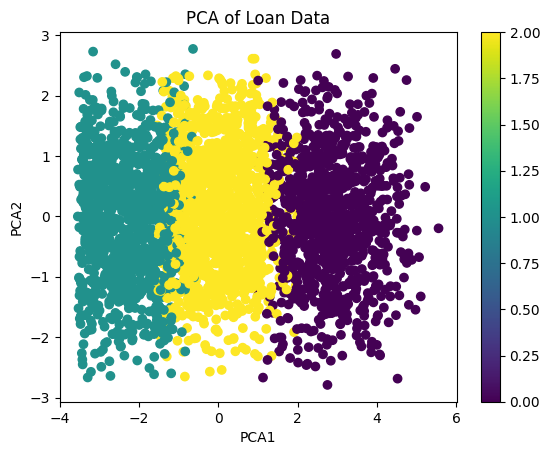

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Apply PCA to reduce the dimensions to 2 (for visualization) unsupervised learning
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

# Visualize the reduced data in 2D
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=clusters, cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA of Loan Data')
plt.colorbar()
plt.show()


#  Step 7: Save Trained Components
StandardScaler standardizes features by removing the mean and scaling to unit variance. It ensures all features contribute equally to distance-based models like KMeans or PCA.

In [ ]:
# ✅ Save all components: XGBoost model, scaler, PCA, and KMeans
import pickle

model_bundle = {
    "xgb_model": xgb_model,
    "scaler": scaler,
    "pca": pca,
    "kmeans": kmeans
}

with open("loan_model_bundle.pkl", "wb") as f:
    pickle.dump(model_bundle, f)

print("✅ All models saved to 'loan_model_bundle.pkl'")


✅ All models saved to 'loan_model_bundle.pkl'


# Step 8 : Testing the model


In [ ]:
# Load all components (model, scaler, PCA, KMeans)
import pickle
import pandas as pd
with open("loan_model_bundle.pkl", "rb") as f:
    loaded_bundle = pickle.load(f)

loaded_model = loaded_bundle["xgb_model"]
loaded_scaler = loaded_bundle["scaler"]
loaded_pca = loaded_bundle["pca"]
loaded_kmeans = loaded_bundle["kmeans"]

# Create a dictionary with the required input fields
#Based on the feature importance we change the input and test
#Try predictions on edge cases: low income + high loan, poor CIBIL, etc., to see if model behaves as expected.
sample_input = {
    'no_of_dependents': 1,
    'education': 0,  # Assuming 0 = Graduate, 1 = Not Graduate (or similar encoding)
    'self_employed': 0,
    'income_annum': 900000,
    'loan_amount': 190000,
    'loan_term': 360,
    'cibil_score': 950,
    'residential_assets_value': 300000,
    'commercial_assets_value': 0,
    'luxury_assets_value': 0,
    'bank_asset_value': 100000
}

# Convert to a DataFrame (model expects the same structure as X_test)
sample_df = pd.DataFrame([sample_input])

# Example: Reuse loaded model
new_prediction = loaded_model.predict(sample_df)
print("Loaded Model Prediction:", "Approved" if new_prediction[0] == 1 else "Not Approved")


# Deep Learning with PyTorch for Loan Approval Prediction

In this notebook, we'll focus on implementing a deep learning solution using PyTorch for our loan approval prediction task. We'll build upon the preprocessing done in TP01 (Pandas) and TP02 (Scikit-learn).

## Steps we'll cover:

1. Introduction to PyTorch tensors and neural network basics
2. Building a neural network model
3. Training process and optimization
4. Model evaluation and visualization
5. Comparing with previous models

Let's start by understanding PyTorch basics and how it differs from traditional machine learning approaches.


# 1. Introduction to PyTorch Tensors

PyTorch is a popular deep learning framework that provides:
- A powerful N-dimensional tensor object
- Automatic differentiation for building neural networks
- GPU acceleration for fast computation

Let's start by understanding how PyTorch tensors work and how they differ from NumPy arrays.


In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create different types of tensors
# 1. From Python list
tensor_from_list = torch.tensor([1, 2, 3, 4, 5])
print("Tensor from list:", tensor_from_list)

# 2. From NumPy array
numpy_array = np.array([1, 2, 3, 4, 5])
tensor_from_numpy = torch.from_numpy(numpy_array)
print("\nTensor from NumPy:", tensor_from_numpy)

# 3. Random tensor
random_tensor = torch.rand(3, 3)
print("\nRandom tensor:\n", random_tensor)

# 4. Tensor operations
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])
print("\nAddition:", a + b)
print("Multiplication:", a * b)

# 5. Tensor with gradients
x = torch.tensor([1., 2., 3.], requires_grad=True)
y = x * 2
z = y.mean()
z.backward()  # Compute gradients
print("\nGradients:", x.grad)  # Shows dz/dx


Tensor from list: tensor([1, 2, 3, 4, 5])

Tensor from NumPy: tensor([1, 2, 3, 4, 5])

Random tensor:
 tensor([[0.3130, 0.3548, 0.9303],
        [0.9851, 0.4685, 0.5454],
        [0.2129, 0.7359, 0.3756]])

Addition: tensor([5, 7, 9])
Multiplication: tensor([ 4, 10, 18])

Gradients: tensor([0.6667, 0.6667, 0.6667])


# 2. Loading Pre-processed Data

We'll use the pre-processed data from TP02. The data has already been:
- Cleaned and formatted (TP01)
- Encoded and scaled (TP02)

Now we'll load this data and convert it into PyTorch tensors for our neural network.


In [ ]:
# Load the pre-processed data
df_scaled = pd.read_csv('loan_approval_scaled.csv')

# Prepare features and target
X = df_scaled.drop('loan_status', axis=1)
y = df_scaled['loan_status']

# Convert to PyTorch tensors
X_tensor = torch.FloatTensor(X.values)
y_tensor = torch.FloatTensor(y.values)

print("Feature tensor shape:", X_tensor.shape)
print("Target tensor shape:", y_tensor.shape)

# Create train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

print("\nTraining set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Feature tensor shape: torch.Size([4269, 12])
Target tensor shape: torch.Size([4269])

Training set size: torch.Size([3415, 12])
Testing set size: torch.Size([854, 12])


# 3. Building Neural Network Model

Now we'll create a neural network using PyTorch's `nn.Module`. The key components are:
- Input layer (matching our feature dimensions)
- Hidden layers with non-linear activation functions
- Output layer with sigmoid activation for binary classification
- Dropout layers for regularization

Let's implement this step by step.


In [ ]:
import torch.nn as nn

class LoanApprovalNet(nn.Module):
    def __init__(self, input_size):
        super(LoanApprovalNet, self).__init__()
        
        # First hidden layer
        self.hidden1 = nn.Linear(input_size, 64)
        self.batch_norm1 = nn.BatchNorm1d(64)
        self.dropout1 = nn.Dropout(0.3)
        
        # Second hidden layer
        self.hidden2 = nn.Linear(64, 32)
        self.batch_norm2 = nn.BatchNorm1d(32)
        self.dropout2 = nn.Dropout(0.2)
        
        # Output layer
        self.output = nn.Linear(32, 1)
        
        # Activation functions
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        # First hidden layer
        x = self.hidden1(x)
        x = self.batch_norm1(x)
        x = self.relu(x)
        x = self.dropout1(x)
        
        # Second hidden layer
        x = self.hidden2(x)
        x = self.batch_norm2(x)
        x = self.relu(x)
        x = self.dropout2(x)
        
        # Output layer
        x = self.output(x)
        x = self.sigmoid(x)
        
        return x

# Create model instance
input_size = X_train.shape[1]
model = LoanApprovalNet(input_size)
print(model)


LoanApprovalNet(
  (hidden1): Linear(in_features=12, out_features=64, bias=True)
  (batch_norm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.3, inplace=False)
  (hidden2): Linear(in_features=64, out_features=32, bias=True)
  (batch_norm2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (output): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)


# 4. Training Process

The training process in PyTorch involves:
1. Forward pass: Making predictions
2. Computing loss: Measuring prediction error
3. Backward pass: Computing gradients
4. Optimization step: Updating weights

We'll also implement:
- Learning rate scheduling
- Early stopping
- Training progress visualization


In [ ]:
# Create data loaders
from torch.utils.data import TensorDataset, DataLoader

# Create datasets
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Loss function and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.5)

# Training loop
num_epochs = 100
train_losses = []
val_losses = []
best_val_loss = float('inf')
patience = 10
patience_counter = 0

print("Starting training...")
for epoch in range(num_epochs):
    # Training phase
    model.train()
    train_loss = 0
    for batch_X, batch_y in train_loader:
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y.view(-1, 1))
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
    
    # Validation phase
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            outputs = model(batch_X)
            val_loss += criterion(outputs, batch_y.view(-1, 1)).item()
    
    # Calculate average losses
    avg_train_loss = train_loss / len(train_loader)
    avg_val_loss = val_loss / len(test_loader)
    
    # Store losses
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    
    # Learning rate scheduling
    scheduler.step(avg_val_loss)
    
    # Early stopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
    else:
        patience_counter += 1
        
    if patience_counter >= patience:
        print(f"Early stopping at epoch {epoch+1}")
        break
    
    # Print progress
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}]')
        print(f'Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}')


Starting training...
Epoch [10/100]
Train Loss: 0.6596, Val Loss: 0.6610
Epoch [20/100]
Train Loss: 0.6331, Val Loss: 0.6282
Early stopping at epoch 26


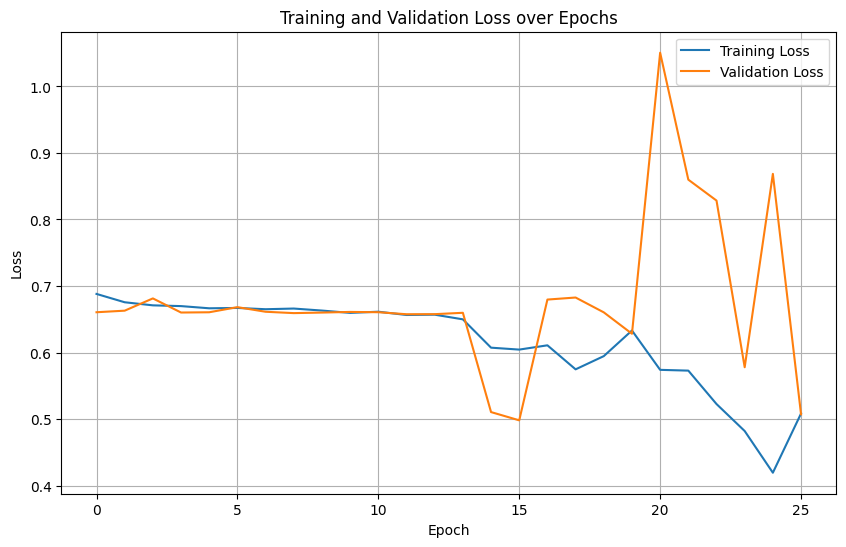


Test Accuracy: 0.7354

Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.44      0.55       318
         1.0       0.73      0.91      0.81       536

    accuracy                           0.74       854
   macro avg       0.74      0.68      0.68       854
weighted avg       0.74      0.74      0.72       854


Confusion Matrix:
[[140 178]
 [ 48 488]]


In [ ]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    y_pred_class = (y_pred >= 0.5).float().view(-1)
    
    # Calculate accuracy
    accuracy = (y_pred_class == y_test).float().mean()
    print(f'\nTest Accuracy: {accuracy.item():.4f}')
    
    # Additional metrics
    from sklearn.metrics import classification_report, confusion_matrix
    print('\nClassification Report:')
    print(classification_report(y_test.numpy(), y_pred_class.numpy()))
    
    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test.numpy(), y_pred_class.numpy()))


# 5. Advanced PyTorch Features

Now let's explore some advanced PyTorch features that make it powerful for deep learning:
1. Model interpretability
2. Feature importance visualization
3. Saving and loading models


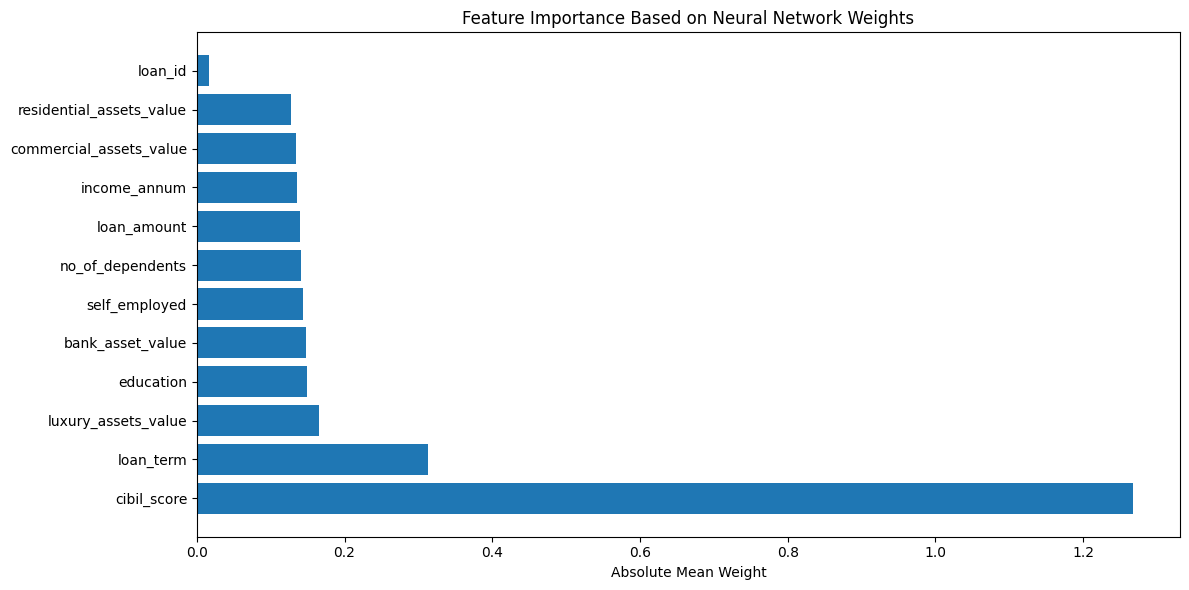


Feature Importance Ranking:
cibil_score: 1.2679
loan_term: 0.3127
luxury_assets_value: 0.1656
education: 0.1491
bank_asset_value: 0.1480
self_employed: 0.1442
no_of_dependents: 0.1407
loan_amount: 0.1398
income_annum: 0.1354
commercial_assets_value: 0.1338
residential_assets_value: 0.1275
loan_id: 0.0166


In [ ]:
# Feature importance based on first layer weights
def get_feature_importance(model, feature_names):
    # Get the weights from the first layer
    weights = model.hidden1.weight.data
    
    # Calculate the absolute mean of weights for each input feature
    importance = torch.abs(weights).mean(dim=0)
    
    return {name: imp.item() for name, imp in zip(feature_names, importance)}

# Get feature names from original dataset
feature_names = X.columns.tolist()

# Calculate feature importance
importance_dict = get_feature_importance(model, feature_names)

# Sort features by importance
sorted_features = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

# Plot feature importance
plt.figure(figsize=(12, 6))
features, importance = zip(*sorted_features)
plt.barh(features, importance)
plt.title('Feature Importance Based on Neural Network Weights')
plt.xlabel('Absolute Mean Weight')
plt.tight_layout()
plt.show()

# Print feature importance ranking
print("\nFeature Importance Ranking:")
for feature, imp in sorted_features:
    print(f"{feature}: {imp:.4f}")


In [ ]:
# Save the trained model
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'scheduler_state_dict': scheduler.state_dict(),
    'train_losses': train_losses,
    'val_losses': val_losses
}, 'loan_approval_pytorch_model.pth')

print("Model saved successfully!")

# Example of how to load the model
def load_model(model_path):
    checkpoint = torch.load(model_path)
    model = LoanApprovalNet(input_size)
    model.load_state_dict(checkpoint['model_state_dict'])
    return model

# Load the model (commented out as example)
# loaded_model = load_model('loan_approval_pytorch_model.pth')


Model saved successfully!
